# Dimensionality Reduction

First things first: what does it mean?  

Just as the name implies, we indicate that we are reducing the dimensionality of our data. In a nutshell, we are reducing some features and cutting some corners.  

Why would we want this?  

Just as in real life, all data is not most important data. Every second, our sensory organs get a **lot** of input. Most of it is unneeded, so the body evolved to discard it silently. Machines don't have this ability, so it's up to us to clean things up a bit.  
Computer Science is a fascinating field. In every single problem someone writes, that person has to deal with some trade-offs between performance, available hardware, and time.  
In a certain sense, one trade-off we make with dimensionality reduction is that we look for information that does little in offering actually useful information.  

Let's call it by the usual name: *compression*. In standard CS terms, compression is a technique that aims to reduce required storage space. This often results in better performance due to some clever tricks applied by the developers, but that's beside the point.  

We want to compress our data (reduce its dimensionality), while still retaining the most useful information. In other words, we don't want to lose quality.

# Not learning

Dimensionality reduction is not a learning algorithm. It is a preprocessing step. It is a technique that we apply to our data before we start learning. The reason I have put it in the unsupervised learning section is that it is a technique we use without necessarily having the "answer", label or correct output of the data. We simply explore the way data is laid out and try to find patterns. From these patterns, we deduce mathematically what data is most important, what we can discard, and what we can keep.  

Always remember that statistics is the foundation of machine learning. Even here, we will be using statistics notions to apply these techniques.

# Principal Component Analysis

There are multiple methods that aim to reduce dimensionality of our data. We will be looking at the most popular one: Principal Component Analysis (PCA). In mathematical terms, PCA helps identify a hyperplane with lower dimensionality that lays closest to the raw representation in n-dimensional space of our data. We then project our data onto this hyperplane, thus eliminating some of the dimensions (features).

Here are the mechanics:
- normalization: we want standardized data values, since PCA is sensitive to scale of data; normalize so that the mean is 0 in order to calculate the covariance matrix
- covariance matrix: we want to find the covariance matrix of our data; this is a matrix that contains the degree to which each pair of features varies together, meaning that *if* feature X and feature Y tend to grow together, their covariance value goes towards $+\infty$ (depending on the "intensity" of this growth); the opposite applies for features that go in opposite directions, where their covariance value goes towards $-\infty$; we use this to determine what kind of information we can discard
- eigenvectors and eigenvalues: as you can see by now, the math does come with some interesting terms we haven't previously discussed; instead of going in-depth right now, only think about this: by multiplying eigenvectors with the covariance matrix, we get a scaled version of the eigenvectors (same orientation, but different magnitude); that scalar value by which the vector was modified is called the eigenvalue; what we're looking for are the eigenvectors with the biggest eigenvalues; they indicate the most useful features of the whole dataset
- last step of applying PCA: now that we know which features are the most relevant for our task at hand, we select a number of the best of them; that is our new dataset, which we use to do our work further.


### Before going forward

Before moving on though, I'd like to mention that PCA is not only used for dimensionality reduction (in this case, feature extraction). Through it's importance-discovering nature, it can help us with other tasks, like visualizations (by helping us eliminate the cluttered data) or anomaly detection (referring to datapoints that don't fall within normal boundaries).  

### Normalization

We've seen this step in action before. We're dealing with continuous values. By subtracting the mean, we get a standardized dataset.

### Covariance matrix

This matrix contains information about relationships between different features of the data. Mathematically, these are the steps:
- standardize features (as we've done in the previous step)
- construct a matrix X out of the new, normalized data; each row is an observation, each column is a feature
- do dot product of X' (X transpose) and X
- divide the result by (n-1) or n, where n is the number of observations (rows in the matrix)

The formula would then become this:
$$
Covariance(X) = \frac{1}{n-1} \cdot X^T \cdot X
$$
Remember! the X matrix we use here contains standardized data.  
In order to better understand what things look like, we will apply these steps to a dataset.

#### Note on correlation

It is important not to confuse covariance with correlation. Correlation is a normalized (scaled) version of covariance. It is a value between -1 and 1, where 1 means that the two features are perfectly correlated, 0 means that there is no correlation, and -1 means that the two features are perfectly negatively correlated. What matters here is the magnitude of the correlation, not the sign, whereas with covariance we would only care about the sign, since the magnitute does not convey the most important information. The way we obtain correlation coefficients is by dividing with the standard deviation of each feature before doing the dot product.


In [180]:
# Import a dataset to calculate the covariance matrix
from sklearn.datasets import load_iris
# Import seaborn for visualization
import seaborn as sns
# Import library to visualize covariance matrix
import matplotlib.pyplot as plt
# Import numpy
import numpy as np

In [181]:
# Import dataset and visualize covariance matrix
X, y = load_iris(return_X_y=True)
# Scale X

Xscaled = (X - np.mean(X, axis = 0))
cov = 1/(Xscaled.shape[0]) * np.dot(Xscaled.T, Xscaled)

Xscaledcorr = Xscaled / np.std(Xscaled, axis = 0)
corr = 1/(Xscaledcorr.shape[0]) * np.dot(Xscaledcorr.T, Xscaledcorr)

# using numpy directly to make sure it is the same
covnp = np.cov(X.T, bias=True)
corrnp = np.corrcoef(X.T)


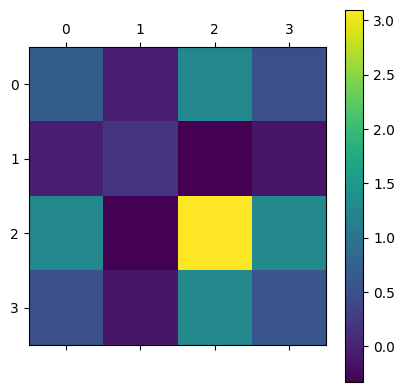

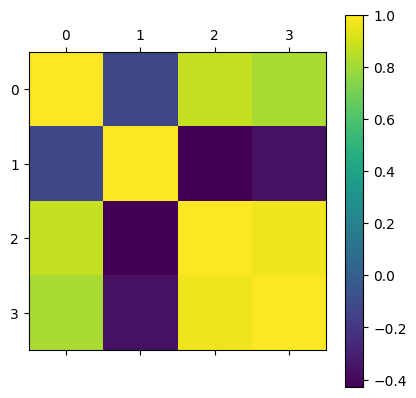

In [182]:
# Plot covariance matrix, also show scale
plt.matshow(cov)
plt.colorbar()
plt.matshow(corr)
plt.colorbar()

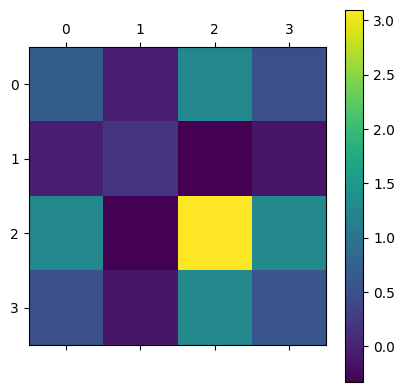

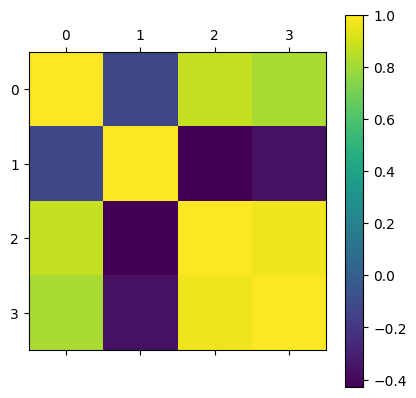

In [183]:
# Numpy function versions
plt.matshow(covnp)
plt.colorbar()
plt.matshow(corrnp)
plt.colorbar()

As we can see, both versions are identical so we know we did something good there. Remember, each row and column corresponds to one of the 4 features of the iris dataset. From the correlation matrix, we would see the correlation between each pair of features.  

As an example, the main diagonal of the covariance matrix contains the variance of each feature. This is because the covariance of a feature with itself is the variance of that feature.  
The correlation matrix instead shows full correlation between a feature and itself. This makes sense, since each feature is perfectly correlated with itself.

## Eigenvecors and eigenvalues

The next step is to find our eigenvectors and eigenvalues. We will use the covariance matrix we just calculated. Instead of explaining the math behind this, I will simply show you the code.  
[3Blue1Brown](https://www.youtube.com/watch?v=PFDu9oVAE-g&ab_channel=3Blue1Brown) has a great video on this topic to dive deeper into the math.  
I would also recommend [this video by StatQuest](https://www.youtube.com/watch?v=FgakZw6K1QQ&list=PLLViszK5qws1SUpVeEiGxHpjnJC-_ZzMy&ab_channel=StatQuestwithJoshStarmer) for a graphical intuition of what PCA does.

In [184]:
# Discovering the eigenvectors of the cov matrix
eigvals, eigvecs = np.linalg.eig(cov)
print(eigvals)
print(eigvecs)

[4.20005343 0.24105294 0.0776881  0.02367619]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


<BarContainer object of 4 artists>

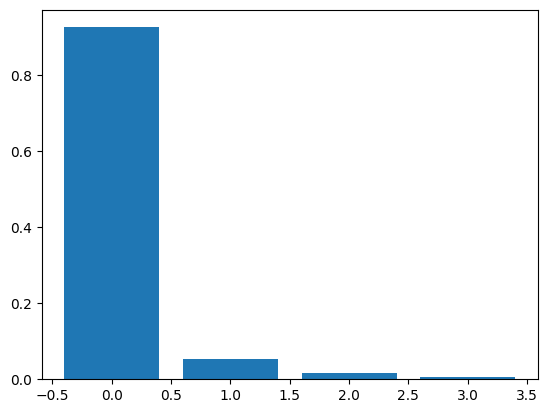

In [185]:
# Bar plot of relative percentage of eigenvalues
plt.bar(range(4), eigvals/sum(eigvals))


This leads to the next point: what does PCA actually seek to preserve? What kind of mathematical information is deemed as important?  

## PCA and variance

PCA seeks to preserve the variance of the data. This is why we use the covariance matrix. The covariance matrix contains information about the variance of each feature. The eigenvectors with the biggest eigenvalues are the ones that preserve the most variance. This is why we discard the other eigenvectors.


We print the eigenvalues and the percentage their value covers and we see that only 1 of them is obviously bigger than the rest (accounting for ~90% of the total variance). It is now time to talk about principal components.

## Principal components

So far, we have calculated the eigenvectors and eigenvalues. We call the eigenvectors "**principal components**". These vectors are directions of new axes in the feature space. Remember in the beginning how we said that PCA seeks to find a hyperplane that lays closest to the raw representation of our data? Well, these principal components are the axes of that hyperplane. Depending on how many we select, we will have a different number of dimensions. Each of the 4 features of our dataset is mapped onto each of the axes (principal components). This, in turn, creates new features. Generally, we would select principal components so that they cover the vast majority of the variance of the data (the eigenvalues tell us how much variance each principal component covers; the eigenvalues are the sums of squared distances from origin to each point on the principal component axis). We would want >80% of the variance to be covered. In our case, a single principal component covers >90% of the variance, so we would select only that one. If our eigenvalues were all roughly equal, we would not be able to reduce the dimensionality of our data, since all principal components would be equally important and if any were missing, we would lose too much variance of the original data.

By projecting our data onto the principal component, we have reduced its dimensionality. A vector of size (1x4) multiplied by one of size (n x 4) (transposed) will result in a vector of size (n x 1) (after transposing again). This is why we can say that we have reduced the dimensionality of our data from 4 to 1. We have calculated a new feature that keeps 90% of the variance of the original data, while reducing the number of features to 1.  

### Note

One important thing to remember: The fact that the 1st eigenvalue is so much bigger than the rest does not mean that the 1st feature is the most important one. It just means that the 1st principal component is the one that preserves the most variance. In order to look at the importance of each feature, we would have to scale the eigenvector to a unit vector. Each element of the vector would then represent "how much" of each feature is taken into account when creating that hyperplane axis.

Let's first take a look at each feature's distribution by itself. The bigger the spread, the more variance it has.

In [186]:
# Load the iris dataset to pandas dataframe
df = sns.load_dataset('iris')

<AxesSubplot: xlabel='petal_width'>

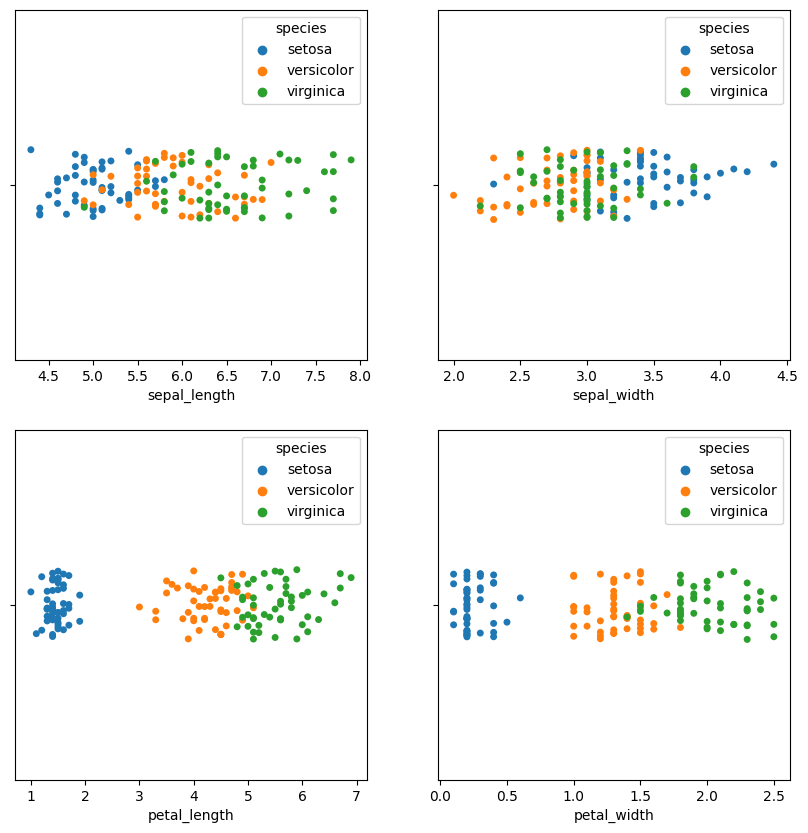

In [187]:
# Big plot with 4 subplots
# Each subplot is a stripplot of each feature independently on 1D axis
# use seaborn, different colors for the different classes
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# Apply jitter to be able to see the distribution of the points better; without it, many points would overlap and only 1 color shown, which is harder to interpret
sns.stripplot(x="sepal_length", hue="species", data=df, jitter=True, ax=axes[0, 0])
sns.stripplot(x="sepal_width", hue="species", data=df, jitter=True, ax=axes[0, 1])
sns.stripplot(x="petal_length", hue="species", data=df, jitter=True, ax=axes[1, 0])
sns.stripplot(x="petal_width", hue="species", data=df, jitter=True, ax=axes[1, 1])

In [188]:
# Calculate variance for each feature
var = np.var(X, axis = 0)
print(var)

[0.68112222 0.18871289 3.09550267 0.57713289]


What we see here is the variance of each feature. The biggest variance is in the 3rd feature. The rest of them are closer to each other.

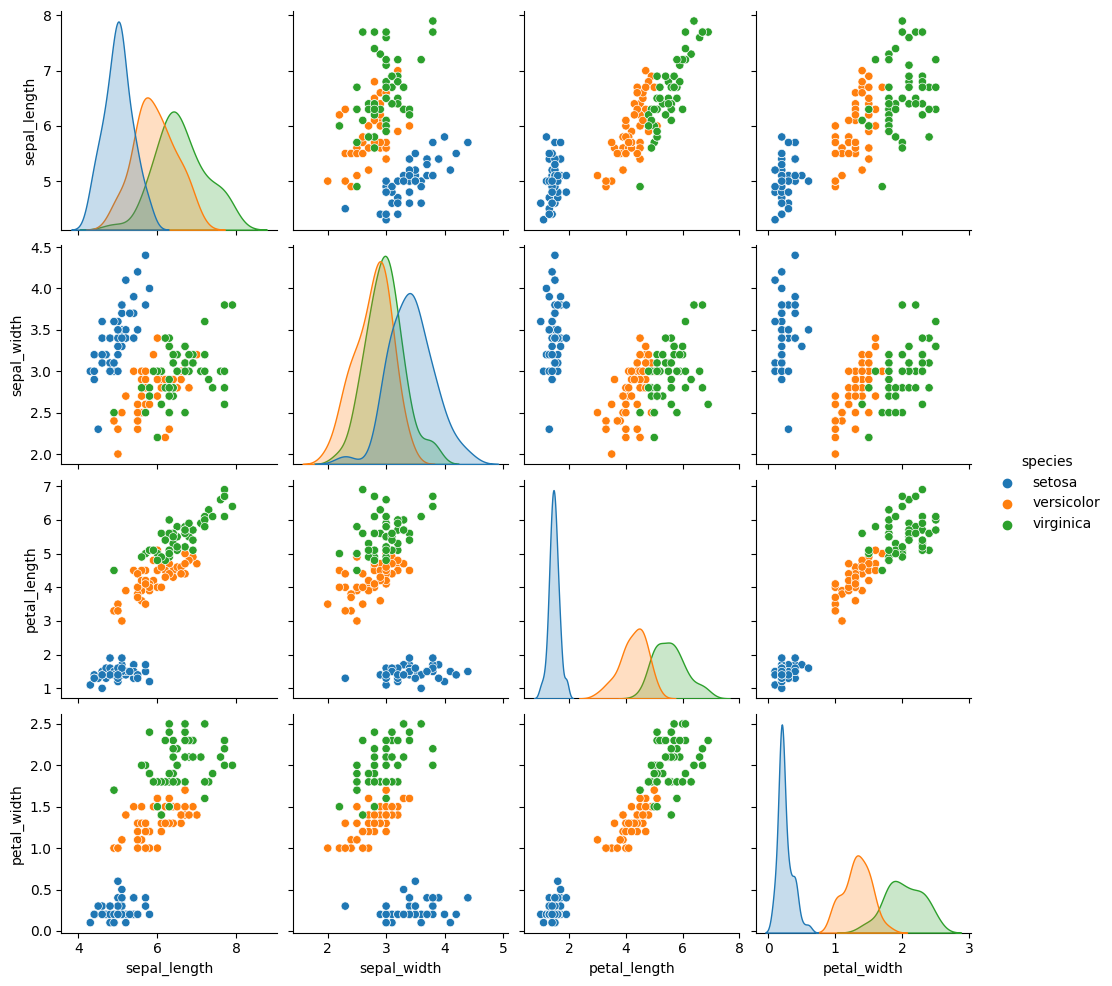

In [189]:
# Visualize each feature in pairs
sns.pairplot(df, hue='species')


What we see here are plots of every possible combination of features the dataset can offer. The main diagonal shows density plots, while the rest of the plots show how each pair of features is distributed. We can see the non-linearity, but we also see some trends. Think back to our eigenvalues, where we saw that only 1 of them was considerably higher than the rest.  

We will now explore that first principal component.  

Note: np.linalg.eig returns the eigenvectors on columns, so that's why we use [:,0] to get the first one.

In [190]:
# Scale the 1st principal component to a unit vector
pc = eigvecs[:,0] / np.linalg.norm(eigvecs[:,0])
print(pc)

[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


We can now see how much of each feature is taken into account when creating that axis. The 2nd and 3rd features have a higher magnitude (although negative; the sign only indicates the direction of the axis, not the importance of the feature). All of the features have some role in this principal component. We will now transform our data onto this principal component.

In [191]:
# Transform data with 1st PC
Xpc = np.dot(X, pc)
print(Xpc.shape)

(150,)


<AxesSubplot: >

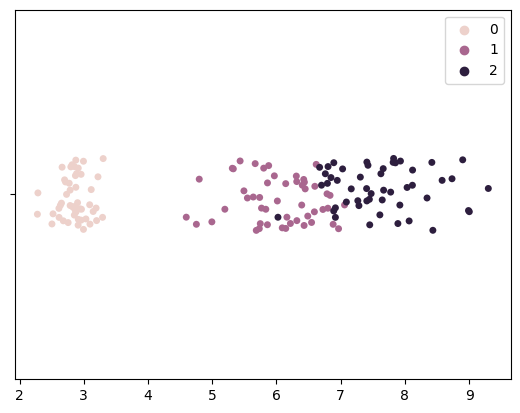

In [192]:
# Plot Xpc as stripplot
sns.stripplot(x=Xpc, hue=y, jitter=True)

We see that the data is separable to a certain degree. At least the "0" class is clearly separated from the other two. This is surely the influence of the 3rd and 4th features

# And that's it

We have applied PCA to the iris dataset. We have talked about covariance and correlation, a little bit about eigenvectors and eigenvalues, and we've seen what the PCA method tries to do.  

As an extra step, let's use scikit-learn to apply PCA and see what happens. We will use the same dataset as before.

In [195]:
# Use scikit-learn to apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
Xpca = pca.fit_transform(X)
print(Xpca.shape)

(150, 1)


<AxesSubplot: >

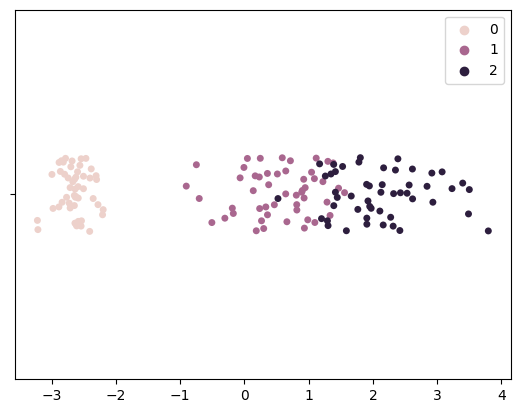

In [198]:
# visualize Xpca
sns.stripplot(x=Xpca.flatten(), hue=y, jitter=True)

As we can see, it's pretty much the same result. We can explore the principal components and see what each of them does as a result. I leave that as an exercise, but I want to see what 2 PCs would do to our data.

In [199]:
# 2 pcs
pca2 = PCA(n_components=2)
Xpca2 = pca2.fit_transform(X)
print(Xpca2.shape)

(150, 2)


<AxesSubplot: >

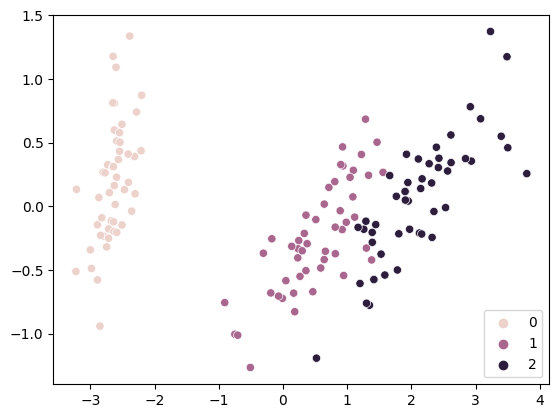

In [200]:
# visualize Xpca2
sns.scatterplot(x=Xpca2[:,0], y=Xpca2[:,1], hue=y)

The data is quite separable, so it is worth it to use 2PCs.

# Other methods

PCA is by far the most popular method for dimensionality reduction and lower dimension visualization, but it's not the only one. There are others, and we'll try to go through them and talk a bit about how they do it (not going into detail, since they would be separate, long topics).

### Kernel PCA

Just like with SVMs before, we can use a kernel to transform our data into a higher dimension. This is what Kernel PCA does. It uses a kernel to transform the data into a higher dimension, then it applies PCA to that transformed data. This is useful when the data is not linearly separable.

### LLE = Locally Linear Embedding

LLE is a method that tries to preserve the local structure of the data. It does this by trying to find the best linear approximation of each point in the dataset (it chooses the k nearest neighbours to try to approximate a linear function on). It then tries to find the best way to represent the data in a lower dimension, while preserving the local structure of the data.

### t-SNE = t-distributed Stochastic Neighbor Embedding

t-SNE tries to keep instances that are similar close and those that differ apart. Useful especially for visualization.  

### Linear Discriminant Analysis

LDA is actually a classification method, but it learns the most discriminative axes between classes. Those can be used to project the data onto them and reduce the dimensionality of the data. The result is that these projections try to keep classes as far apart as possible.

# Going forward

Up until this point we've gone through a lot of algorithms/methods. I call these "classic methods", since they mostly rely on statistics and linear algebra. We've seen how they work, how to use them and how to make decisions when using them.  

The next chapter is the opening of the modern ML era: [Neural networks](../supervisedLearning/neuralNetworks.ipynb), the most popular kind of model these days. We'll see what they are, how they work, what kinds there are and how they differ.